# MIS 587: Group 14 Presentation
Client: Parking and Transportation Services

### Importing all required packages

In [230]:
import gmplot
import pandas as pd
import xlrd
import IPython

import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
%matplotlib notebook


import requests
import googlemaps
from datetime import datetime
import gmaps

### Setting API Key

In [231]:
apikey = ''

### Loading Data 

In [232]:
emp_data = pd.read_excel('/Users/tazeenmunnavar/MIS 587: BI Project/Data/emp_85716_85719.xlsx')
emp_data.head(5)

latitudes = emp_data['Latitude']
longitudes = emp_data['Longitude']
list(emp_data.columns)

['id',
 'Street',
 'City',
 'State',
 'ZipCode',
 'BUILDING_NAME',
 'DEPT_ID',
 'DEPT_NAME',
 'Lat/Long',
 'Latitude',
 'Longitude']

# Gmplot 

In [233]:
# Load Map - lat/long here is the center of the map for now & 14 is the zoom level
gmap = gmplot.GoogleMapPlotter(32.232570, -110.951930, 14, apikey)

gmap.scatter(latitudes, longitudes, '#3B0B39', size=40, marker=False)
gmap.draw("gmplot-scatter-top9-zips_85716-85719.html")

#IPython.display.HTML(filename='gmplot-scatter-top9-zips_85716-85719.html')

In [234]:
from IPython.display import IFrame

IFrame(src='./gmplot-scatter-top9-zips_85716-85719.html', width=700, height=600)

# Kmeans Algorithm

In [255]:
emp_subset = emp_data.loc[:,['id','Latitude','Longitude']]
emp_subset.head(5)

,id,Latitude,Longitude
0,1399833,31.955892,-110.767984
1,1403543,31.955892,-110.767984
2,1388974,32.117711,-110.945735
3,1390194,32.181449,-110.964797
4,1419094,32.184732,-110.874504


In [256]:
K_clusters = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = emp_data[['Latitude']]
X_axis = emp_data[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]

In [257]:
kmeans = KMeans(n_clusters = 20, init ='k-means++')

# Compute k-means clustering. 
kmeans.fit(emp_subset[emp_subset.columns[1:3]])

emp_subset['cluster_label'] = kmeans.fit_predict(emp_subset[emp_subset.columns[1:3]])

# Coordinates of cluster centers.
centers = kmeans.cluster_centers_ 
print('Centers: {0}'.format(centers))

# Labels of each point
labels = kmeans.predict(emp_subset[emp_subset.columns[1:3]]) 

Centers: [[  32.25351052 -110.91705197]
 [  39.23427     -94.724985  ]
 [  38.833654    -77.641816  ]
 [  32.22853689 -110.93763554]
 [  31.9558918  -110.7679842 ]
 [  32.24652309 -110.94727224]
 [  32.27809245 -110.95125223]
 [  32.22607156 -110.87321923]
 [  32.26990683 -110.9306448 ]
 [  32.26201065 -110.95217235]
 [  32.22445699 -110.95433329]
 [  32.23110379 -110.91358597]
 [  32.2881541  -110.760516  ]
 [  32.264192   -111.082934  ]
 [  32.1177112  -110.945735  ]
 [  32.21458502 -110.93293328]
 [  32.25618379 -110.93865642]
 [  32.24530789 -110.95797319]
 [  32.23074592 -110.9248968 ]
 [  32.24300233 -110.93081758]]


<IPython.core.display.Javascript object>


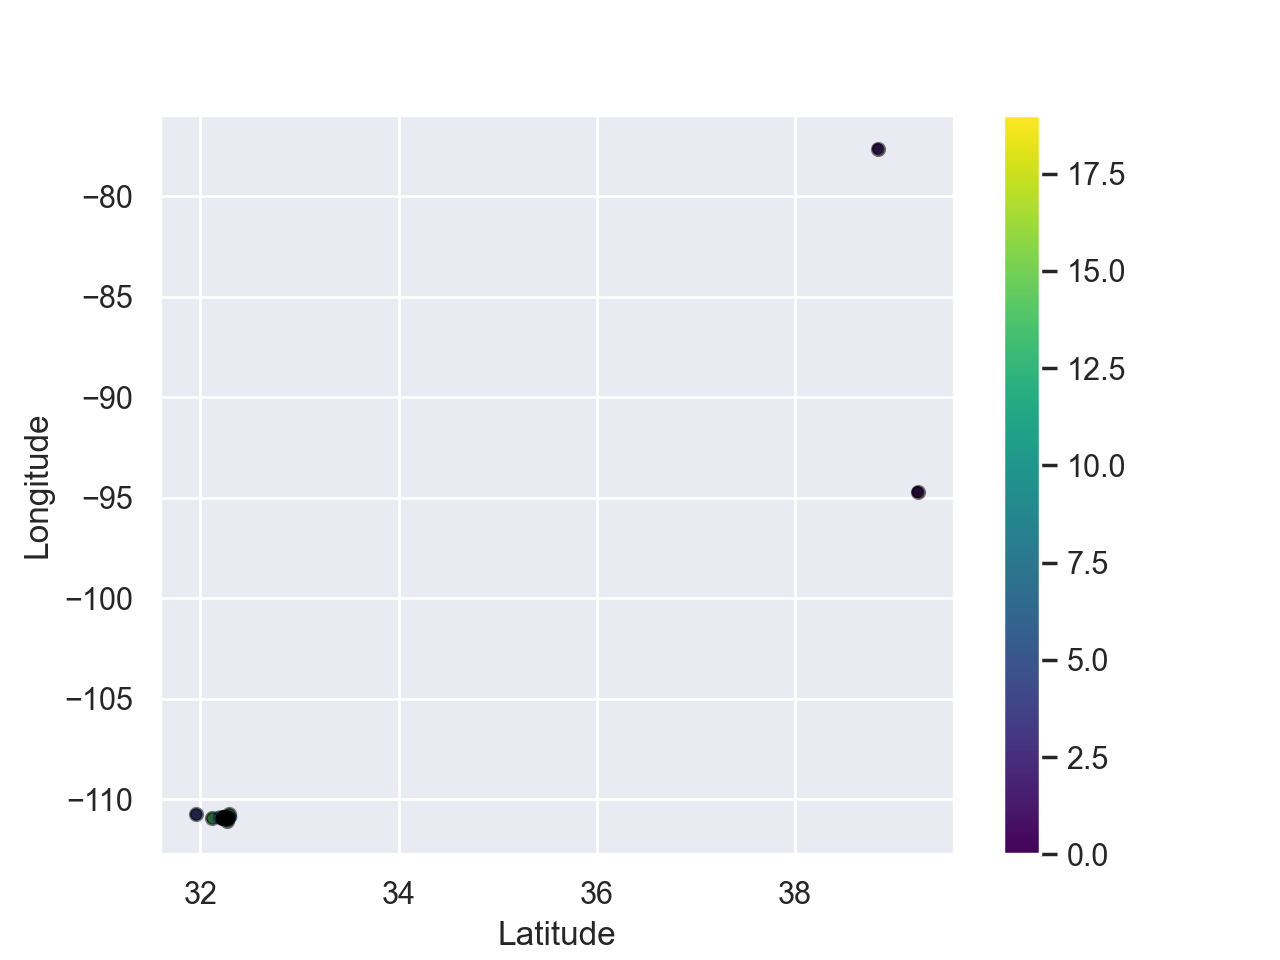

In [258]:
emp_subset.plot.scatter(x = 'Latitude', y = 'Longitude', c = labels, s = 10, cmap = 'viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=20, alpha=0.5)

In [259]:
# Merging cluster label with the original data
clustered_data = emp_data.merge(emp_subset, left_on='id', right_on='id')
clustered_data.head(5)

,id,Street,City,State,ZipCode,BUILDING_NAME,DEPT_ID,DEPT_NAME,Lat/Long,Latitude_x,Longitude_x,Latitude_y,Longitude_y,cluster_label
0,1399833,2938 E Monte Vista,Tucson,AZ,85716,Bear Down Gymnasium,8102,Admissions and New Student Enrollment,"31.9558918,-110.7679842",31.955892,-110.767984,31.955892,-110.767984,4
1,1403543,2551 East Monte Vista Street,Tucson,AZ,85716,ENR2,3008,School of Geography and Development,"31.9558918,-110.7679842",31.955892,-110.767984,31.955892,-110.767984,4
2,1388974,1221 N Plumer,Tucson,AZ,85719,Psychology,423,Psychology,"32.1177112,-110.945735",32.117711,-110.945735,32.117711,-110.945735,14
3,1390194,2016 E 6th,Tucson,AZ,85719,Education,3222,"Teaching, Learning and Sociocultural Studies","32.18144915,-110.96479694032043",32.181449,-110.964797,32.181449,-110.964797,10
4,1419094,2929E. 10th Street,Tucson,AZ,85716,Learning Services Building,435,Africana Studies,"32.1847316,-110.8745035",32.184732,-110.874504,32.184732,-110.874504,7


In [260]:
centers = kmeans.cluster_centers_.tolist()
print(centers)

[[32.25351051753928, -110.91705196517712], [39.23427, -94.724985], [38.833654, -77.641816], [32.228536885719215, -110.93763554380168], [31.9558918, -110.7679842], [32.24652308684486, -110.94727223764895], [32.278092448376064, -110.95125223148108], [32.2260715594584, -110.87321922675908], [32.26990682794202, -110.93064480264427], [32.26201065285314, -110.95217234687502], [32.224456991421135, -110.95433328636364], [32.231103787683644, -110.91358597295381], [32.2881541, -110.760516], [32.264192, -111.082934], [32.1177112, -110.945735], [32.21458502171493, -110.93293328023206], [32.256183789285195, -110.93865642026323], [32.24530789264077, -110.95797319325534], [32.23074592179656, -110.92489679874413], [32.243002332741355, -110.93081758180125]]


In [261]:
clusters = clustered_data['cluster_label'].value_counts()
clusters

3     163
10    159
19    155
18    114
9     113
16    109
5     109
8     108
6     102
0      98
17     95
15     88
11     84
7      26
1       3
4       2
14      1
13      1
12      1
2       1
Name: cluster_label, dtype: int64

In [262]:
labels = clusters.index.values.tolist()
labels

[3, 10, 19, 18, 9, 16, 5, 8, 6, 0, 17, 15, 11, 7, 1, 4, 14, 13, 12, 2]

In [263]:
waypoints = [centers[i] for i in labels]
waypoints

[[32.228536885719215, -110.93763554380168],
 [32.224456991421135, -110.95433328636364],
 [32.243002332741355, -110.93081758180125],
 [32.23074592179656, -110.92489679874413],
 [32.26201065285314, -110.95217234687502],
 [32.256183789285195, -110.93865642026323],
 [32.24652308684486, -110.94727223764895],
 [32.26990682794202, -110.93064480264427],
 [32.278092448376064, -110.95125223148108],
 [32.25351051753928, -110.91705196517712],
 [32.24530789264077, -110.95797319325534],
 [32.21458502171493, -110.93293328023206],
 [32.231103787683644, -110.91358597295381],
 [32.2260715594584, -110.87321922675908],
 [39.23427, -94.724985],
 [31.9558918, -110.7679842],
 [32.1177112, -110.945735],
 [32.264192, -111.082934],
 [32.2881541, -110.760516],
 [38.833654, -77.641816]]

# Routes

In [244]:
origin = (32.232571,-110.951927)
#origin = tuple(map(float, origin.split(',')))

# Destination is set to Student Unions - Temporary
destination = (32.232571,-110.951927)

top_waypoints = waypoints[0:3]
top_waypoints

[[32.26240516797177, -110.94515042221329],
 [32.2255411588346, -110.94618317863026],
 [32.23850886416996, -110.92169114543375]]

In [245]:
gmaps.configure(api_key = apikey)
fig = gmaps.figure()          

layer = gmaps.directions_layer(origin, destination, waypoints = top_waypoints,
                               travel_mode='DRIVING', stroke_opacity=1.0, stroke_weight=3.0)
fig.add_layer(layer)
fig

Figure(layout=FigureLayout(height='420px'))

# Distance and Time from Student Union through Waypoints and back

In [246]:
waypoints_list = [ item for elem in top_waypoints for item in elem]
waypoints_list 

str1 = '|'.join(str(e) for e in waypoints_list)
str1

waypoints_dir = str1.replace('|-', ',-')
way = waypoints_dir.split()
way

origin_dir='32.232571,-110.951927'
destination_dir = '32.232571,-110.951927'
#type(origin_dir)

In [247]:
now = datetime.now()
gmaps = googlemaps.Client(key=apikey)

for x in way:
    directions = gmaps.directions(origin = origin_dir,waypoints = x,destination = destination_dir,
                                  mode='driving',optimize_waypoints=True,departure_time = now)

In [248]:
for i in range(0, 4):
    directions[0]['legs'][i]['distance']['text']
    directions[0]['legs'][i]['duration']['text']
    directions[0]['legs'][i]['start_address']
    directions[0]['legs'][i]['end_address']
    
df = pd.DataFrame({'Address': emp_data['Street'],
                  'Location': emp_data['Lat/Long'],
                   'Latitude': emp_data['Latitude'],
                   'Longitude': emp_data['Longitude']
                  })
df

,Address,Location,Latitude,Longitude
0,2938 E Monte Vista,"31.9558918,-110.7679842",31.955892,-110.767984
1,2551 East Monte Vista Street,"31.9558918,-110.7679842",31.955892,-110.767984
2,1221 N Plumer,"32.1177112,-110.945735",32.117711,-110.945735
3,2016 E 6th,"32.18144915,-110.96479694032043",32.181449,-110.964797
4,2929E. 10th Street,"32.1847316,-110.8745035",32.184732,-110.874504
...,...,...,...,...
1527,5900 N Misty Ridge Dr,"32.313006578084654,-110.906082906588",32.313007,-110.906083
1528,2725 E Prince,"38.833654,-77.641816",38.833654,-77.641816
1529,2550 E. Hampton,"39.23427,-94.724985",39.234270,-94.724985
1530,2356 E Hampton,"39.23427,-94.724985",39.234270,-94.724985


In [20]:
start_address = []
end_address = []
distance = []
journey_time = []

for i in range(0, 4):
    distance.append(directions[0]['legs'][i]['distance']['text'])
    journey_time.append(directions[0]['legs'][i]['duration']['text'])
    start_address.append(directions[0]['legs'][i]['start_address'])
    end_address.append(directions[0]['legs'][i]['end_address'])

In [21]:
df_distance = pd.DataFrame({
            'start_address':start_address,
            'end_address':end_address,
            'distance':distance,
            'journey_time':journey_time},
columns = ['start_address','end_address','distance','journey_time'])

df_distance

,start_address,end_address,distance,journey_time
0,"1303 E University Blvd, Tucson, AZ 85719, USA","6th St/Campbell, Tucson, AZ 85719, USA",1.3 mi,7 mins
1,"6th St/Campbell, Tucson, AZ 85719, USA","3337 E Lee St, Tucson, AZ 85716, USA",2.3 mi,6 mins
2,"3337 E Lee St, Tucson, AZ 85716, USA","1707 E Fort Lowell Rd, Tucson, AZ 85719, USA",3.1 mi,8 mins
3,"1707 E Fort Lowell Rd, Tucson, AZ 85719, USA","1303 E University Blvd, Tucson, AZ 85719, USA",2.6 mi,9 mins


## References
#### 1. https://github.com/JosephMagiya/Clustering-GPS-Co-ordinates--Forming-Regions./blob/master/Clustering-GPS-Co-ordinates--Forming-Regions.ipynb
#### 2. https://github.com/andrecedras/spatial-optimization/blob/master/spatial-optimization%20submission.ipynb


In [22]:
import geopy.distance

coords_1 = (32.232571,-110.951927)
coords_2 = (32.240400, -110.958170)

km = geopy.distance.distance(coords_1, coords_2).km
#print(km)
miles = geopy.distance.distance(coords_1, coords_2).km * (0.621371)
print(miles)

0.6516778770570191


In [23]:
origin = (32.232571,-110.951927)
for x in emp_data['Lat/Long']:
    miles = geopy.distance.distance(origin, x).km * (0.621371)
    print(miles)

21.905296567774116
21.905296567774116
7.922586073219023
3.602290656549762
5.606927870209374
6.077862425895989
2.0314208167965395
1.862727278244437
1.8987958341245732
1.9821856275908745
1.8437376205651896
1.8846477999076294
1.8846477999076294
1.871728053310008
2.0018120222710407
2.065490337785251
1.8868807375078567
1.7918045819387447
1.7613459418848507
1.7518699736573151
1.8697241780493303
1.820679636729989
5.392973633529909
1.5374333964477898
1.7734825621096604
1.7734825621096604
1.8660439422995618
1.9200756488511979
1.9200756488511979
2.07008001398366
1.684475207883783
1.6907895055411077
1.9045189311055986
1.7725487838796683
1.8655403773725254
1.8655403773725254
2.0266043501829127
1.6307392731434367
1.6417871161990365
1.9232219124231298
1.5607188083431511
1.588788305770169
1.822100621389763
1.9314815582356513
1.9965715204634271
1.584942991245104
1.530777422093716
1.6218205724598747
1.9461521062607847
1.3333006871309636
1.332663346571601
1.3291509786389908
1.3291509786389908
1.32915097

0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.0822362316794547
0.769842973085039
0.5111984759837848
0.9121456659936323
0.9264663543182855
0.9360143949689179
0.9360143949689179
0.5936093581740197
1.8194763450036437
1.015741471476638
1.157566978454199
1.2635950835403464
1.324476705439715
1.324476705439715
0.5163874498667719
1.413873796645044
0.7492574307603226
0.6772045428340112
0.817988184213417
1.8759165112318865
1.0813017851050504
1.9496691783856137


1.1949574701031156
1.2127590139476716
2.1367218725534958
2.1367218725534958
1.2183785045106077
2.1851821869651107
1.335617492468596
1.3920311957158529
1.4419048393383602
2.6475533585181794
2.300880641114683
1.2348354426053691
4.892579879400742
2.994528588791145
2.994528588791145
2.994528588791145
2.994528588791145
2.994528588791145
2.994528588791145
1.2872055398701412
1.2566615838578852
1.2630553927786345
1.2669479264066619
1.2813953096892885
1.2990663194868124
1.2997990558040864
1.2680355525655242
1.2681077495132018
1.2681077495132018
1.2721038078139861
1.2790228466756817
1.3110378691590565
1.3380833640260288
1.4455912331453764
1.4883367458914403
1.3052768235626533
1.297215613959496
2.5762524943904994
1.367764092937657
2.4666269711180435
1.8440970077453582
1.8382160454813161
1.8574841671022837
1.3277358849553338
1.3278084925626226
1.3298416363388774
1.3371159317705974
1.3479817093970567
1.350840285699291
1.3391621663521562
1.3417374680012737
1.4570142594068756
1.459250510841716
1.4925

In [281]:
cluster3 = clustered_data['cluster_label'] == 6
cluster3_data = clustered_data[cluster3]
#top10 = cluster3_data.head(10)
#top10
cluster3_data
dest = waypoints[8]
dest = str(dest[0]) + ',' + str(dest[1])
dest
cluster3_data = cluster3_data['Lat/Long']

In [282]:
now = datetime.now()
gmaps = googlemaps.Client(key=apikey)

start_address = []
end_address = []
distance = []
journey_time = []

for i in cluster3_data:
    #print(i)
    directions = gmaps.directions(origin = str(i), destination = dest,
                                  mode='walking', departure_time = now)
    for i in range(0, 1):
        directions[0]['legs'][i]['distance']['text']
        directions[0]['legs'][i]['duration']['text']
        directions[0]['legs'][i]['start_address']
        directions[0]['legs'][i]['end_address']
    
    #df = pd.DataFrame({'Address': top10['Street'],
                  #'Location': top10['Lat/Long'],
                   #'Latitude': top10['Latitude_x'],
                   #'Longitude': top10['Longitude_x']
                  #})

    for i in range(0, 1):
        distance.append(directions[0]['legs'][i]['distance']['text'])
        journey_time.append(directions[0]['legs'][i]['duration']['text'])
        start_address.append(directions[0]['legs'][i]['start_address'])
        end_address.append(directions[0]['legs'][i]['end_address'])
    
   
    
    #print(start_address)
    #print(end_address)
    #print(distance)
    #print(journey_time)

#df = df.assign(start_address = start_address.values)
#df['startAddress'] = start_address.values  

df_distance = pd.DataFrame({ 'start_address':start_address,'end_address':end_address,'distance':distance,'journey_time':journey_time},
columns = ['start_address','end_address','distance','journey_time'])

df_distance

,start_address,end_address,distance,journey_time
0,"1514 E Greenlee Rd, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",0.8 mi,15 mins
1,"931 E Windsor St, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",0.8 mi,16 mins
2,"1550 E Prince Rd, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",0.7 mi,13 mins
3,"848 E Prince Rd, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",0.8 mi,16 mins
4,"414 E Prince Rd, Tucson, AZ 85705, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",1.2 mi,24 mins
...,...,...,...,...
97,"1441 E Prospect Ln, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",0.7 mi,14 mins
98,"4307 N Rillito Creek Pl, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",1.0 mi,19 mins
99,"4274 N Rillito Creek Pl, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",1.0 mi,20 mins
100,"715 E Wetmore Rd, Tucson, AZ 85719, USA","1371 E Mountain Pl, Tucson, AZ 85719, USA",1.2 mi,24 mins
